<a href="https://www.kaggle.com/code/sharanharsoor/right-way-of-doing-regression-using-stats-model?scriptVersionId=122397079" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. Reading input files

data_description file has all the info required to understand the data

In [2]:
#!cat /kaggle/input/house-prices-advanced-regression-techniques/data_description.txt

In [3]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col=0)
train_df.tail(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1460,20,RL,75.00000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.00000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.00000,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',index_col=0)
test_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.00000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,TA,CBlock,TA,TA,No,Rec,468.00000,LwQ,144.00000,270.00000,882.00000,GasA,TA,Y,SBrkr,896,0,0,896,0.00000,0.00000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00000,Unf,1.00000,730.00000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [7]:
sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample.head(1)

,Id,SalePrice
0,1461,169277.05250


# 2. handling null values

In [8]:
# columns having null values 
train_df.columns[train_df.isnull().sum()>0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<AxesSubplot:>

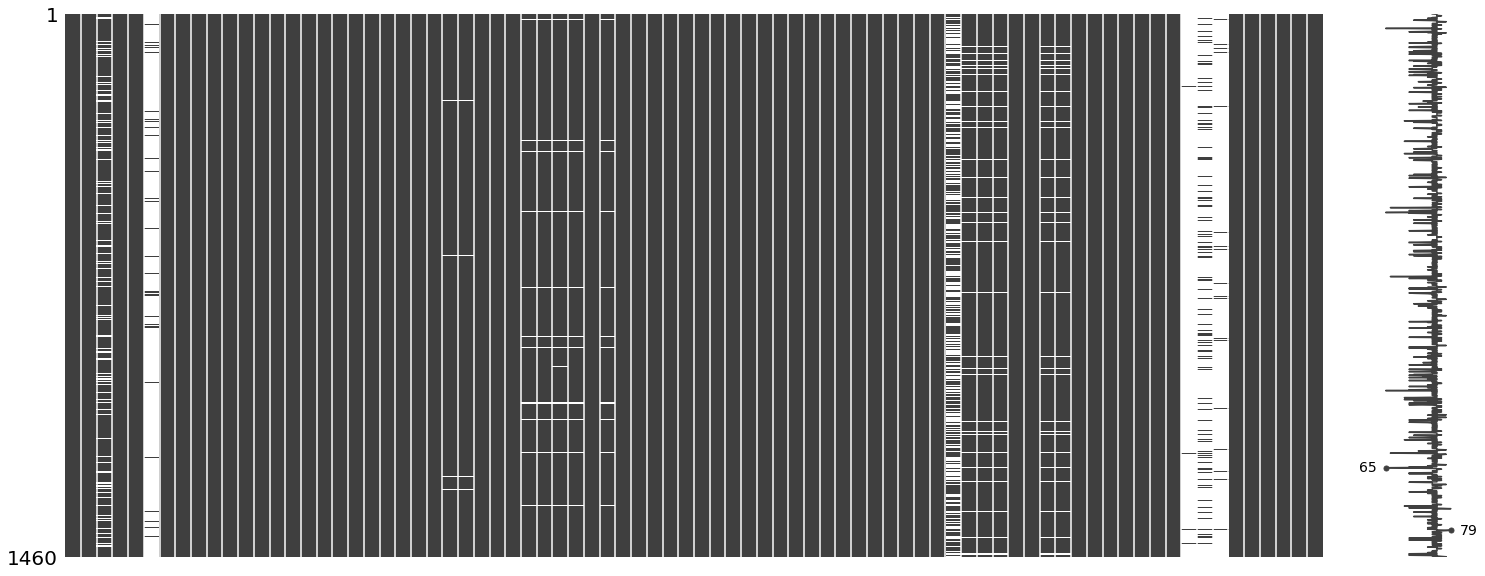

In [9]:
import missingno as msno
msno.matrix(train_df)

drop below below columns.

PoolQC : more than 99% of PoolQC values are null, as many pools might not have pools to measure pool quality.

Alley : nealry 94% of values are null.

MiscFeature :  96% are null so no point in keeping, also not many unique values.

MiscVal : MiscVal is associated with MiscFeature. so dropping MiscFeature makes this drop as well.

Fence :  not many house have got fence, so better to drop it.

In [10]:
print("Unique misc features => ", train_df['MiscFeature'].unique())
print("total non-0 values for misc => ", train_df[train_df.MiscVal>0].shape[0]/train_df.shape[0])
print("Unique fence => ", train_df['Fence'].unique())
train_df.drop(['PoolQC', 'Alley', 'MiscFeature', 'MiscVal', 'Fence'], axis=1, inplace= True)

Unique misc features =>  [nan 'Shed' 'Gar2' 'Othr' 'TenC']
total non-0 values for misc =>  0.03561643835616438
Unique fence =>  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [11]:
# Below categorical variables have missing values, printing the unique values for analysis.

print("FireplaceQu -> ", train_df['FireplaceQu'].unique())
print("GarageType -> ", train_df['GarageType'].unique())
print("GarageFinish ->", train_df['GarageFinish'].unique())
print("GarageQual -> ", train_df['GarageQual'].unique())
print("GarageCond ->", train_df['GarageCond'].unique())
print("MasVnrType ->", train_df['MasVnrType'].unique())
print("BsmtQual ->", train_df['BsmtQual'].unique())
print("BsmtCond ->", train_df['BsmtCond'].unique())
print("BsmtExposure ->", train_df['BsmtExposure'].unique())
print("BsmtFinType1 ->", train_df['BsmtFinType1'].unique())
print("BsmtFinType2 ->", train_df['BsmtFinType2'].unique())
print("Electrical ->", train_df['Electrical'].unique())

FireplaceQu ->  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ->  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish -> ['RFn' 'Unf' 'Fin' nan]
GarageQual ->  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond -> ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
MasVnrType -> ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual -> ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond -> ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure -> ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 -> ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 -> ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical -> ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


1. from data_description file, it's clear that missing values are because of data/item not actually available
rather at random. later this will help with one hot encoding.
2. GarageYrBlt is year filling with 0 for no garages. similar logic applied for other variables.



In [12]:
train_df.fillna({'FireplaceQu':'no', 'GarageType':'no', 'GarageFinish':'no', 'GarageQual':'no',\
                 'GarageCond':'no', 'GarageYrBlt':0, 'MasVnrType':'None', \
                 'BsmtQual':'no', 'BsmtCond':'no', 'BsmtExposure':'no', \
                 'BsmtFinType1':'no', 'BsmtFinType2':'no'}, inplace=True)
train_df['LotFrontage'].fillna(int((train_df['LotFrontage'].mean())), inplace=True)
train_df['MasVnrArea'].fillna(0, inplace=True)
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
# garage year is in float, should be an int.
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].astype(int)

In [13]:
# count after fixing the null values
train_df.columns[train_df.isnull().sum()>0]

Index([], dtype='object')

We have handled all the null values

# 3. Analysing Target variable and encoding for the categorical variables


In [14]:
train_df. describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000,1460.00000
mean,56.89726,70.04110,10516.82808,6.09932,5.57534,1971.26781,1984.86575,103.11712,443.63973,46.54932,567.24041,1057.42945,1162.62671,346.99247,5.84452,1515.46370,0.42534,0.05753,1.56507,0.38288,2.86644,1.04658,6.51781,0.61301,1868.73973,1.76712,472.98014,94.24452,46.66027,21.95411,3.40959,15.06096,2.75890,6.32192,2007.81575,180921.19589
std,42.30057,22.02403,9981.26493,1.38300,1.11280,30.20290,20.64541,180.73137,456.09809,161.31927,441.86696,438.70532,386.58774,436.52844,48.62308,525.48038,0.51891,0.23875,0.55092,0.50289,0.81578,0.22034,1.62539,0.64467,453.69730,0.74732,213.80484,125.33879,66.25603,61.11915,29.31733,55.75742,40.17731,2.70363,1.32810,79442.50288
min,20.00000,21.00000,1300.00000,1.00000,1.00000,1872.00000,1950.00000,0.00000,0.00000,0.00000,0.00000,0.00000,334.00000,0.00000,0.00000,334.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2006.00000,34900.00000
25%,20.00000,60.00000,7553.50000,5.00000,5.00000,1954.00000,1967.00000,0.00000,0.00000,0.00000,223.00000,795.75000,882.00000,0.00000,0.00000,1129.50000,0.00000,0.00000,1.00000,0.00000,2.00000,1.00000,5.00000,0.00000,1958.00000,1.00000,334.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.00000,2007.00000,129975.00000
50%,50.00000,70.00000,9478.50000,6.00000,5.00000,1973.00000,1994.00000,0.00000,383.50000,0.00000,477.50000,991.50000,1087.00000,0.00000,0.00000,1464.00000,0.00000,0.00000,2.00000,0.00000,3.00000,1.00000,6.00000,1.00000,1977.00000,2.00000,480.00000,0.00000,25.00000,0.00000,0.00000,0.00000,0.00000,6.00000,2008.00000,163000.00000
75%,70.00000,79.00000,11601.50000,7.00000,6.00000,2000.00000,2004.00000,164.25000,712.25000,0.00000,808.00000,1298.25000,1391.25000,728.00000,0.00000,1776.75000,1.00000,0.00000,2.00000,1.00000,3.00000,1.00000,7.00000,1.00000,2001.00000,2.00000,576.00000,168.00000,68.00000,0.00000,0.00000,0.00000,0.00000,8.00000,2009.00000,214000.00000
max,190.00000,313.00000,215245.00000,10.00000,9.00000,2010.00000,2010.00000,1600.00000,5644.00000,1474.00000,2336.00000,6110.00000,4692.00000,2065.00000,572.00000,5642.00000,3.00000,2.00000,3.00000,2.00000,8.00000,3.00000,14.00000,3.00000,2010.00000,4.00000,1418.00000,857.00000,547.00000,552.00000,508.00000,480.00000,738.00000,12.00000,2010.00000,755000.00000


In [15]:
import plotly.express as px
fig = px.scatter(train_df['SalePrice'])
fig.show()

Currently we are using below code to remove outliers. kept for reference.

In [16]:
# from the statistics it is clear that, some of the data does have outliers. better to get rid of them.
# eg, from above sales graph it is clear that there are very few houses with super high cost. 
# like wise at a look, few other columns have outliers are SalePrice, MSSubClass, LotFrontage, LotArea, 
# MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea
# WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MoSold

# taking the 99 percentile of columns that seems to have outliers and drop them accordingly.

columns = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF',\
       'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF',\
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
#for col in columns:
    #train_df = train_df.drop(train_df[(train_df[[col]] > val)])
    #train_df = train_df.drop(train_df[train_df[col]>val], axis=0)
    #print(train_df[train_df[col]>val])

In [17]:
y_train = train_df.pop('SalePrice')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



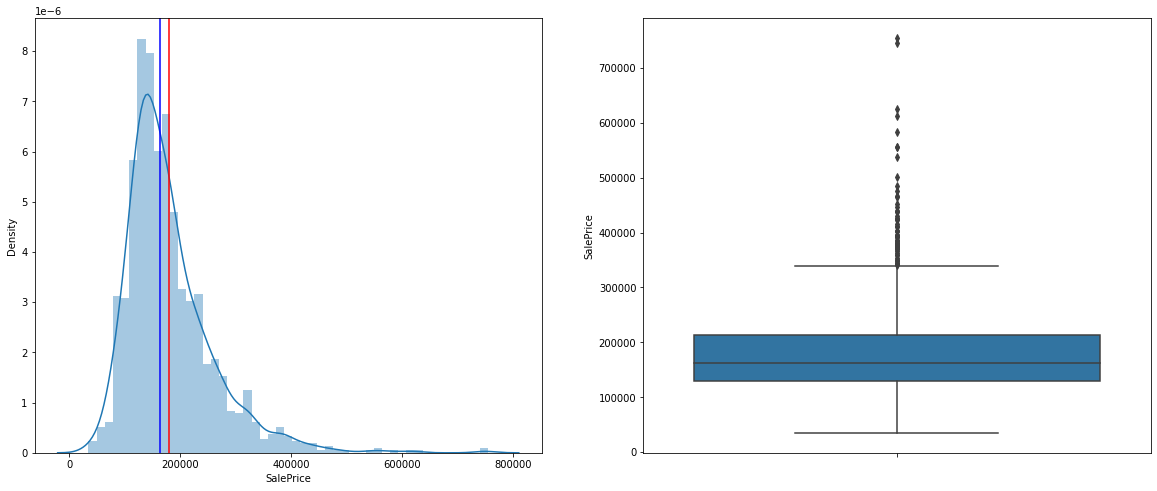

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(y_train)
plt.axvline(y_train.mean(), color="r")
plt.axvline(y_train.median(), color="b")

plt.subplot(1,2,2)
sns.boxplot(y = y_train)

plt.show()

Data distribution of target variable and it does have outliers in the data.

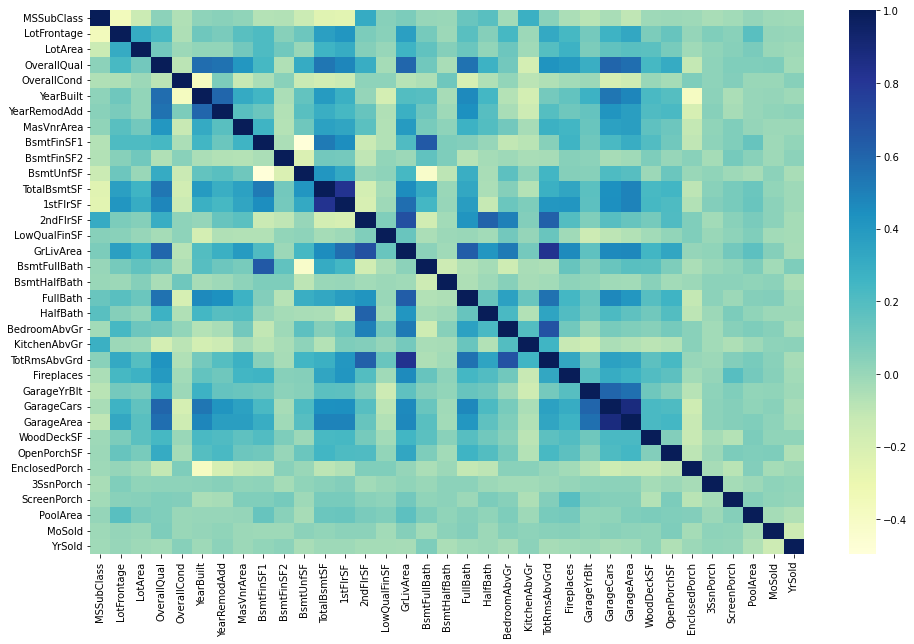

In [19]:
plt.figure(figsize = (16, 10))
sns.heatmap(train_df.corr(), annot = False, cmap="YlGnBu")
plt.show()

Co-relation between 1ndFlrSF and 2ndFlrSF, variables with garage have high. Otherwise heatmap isn't giving much info as dataset contains lot of categorical variables.

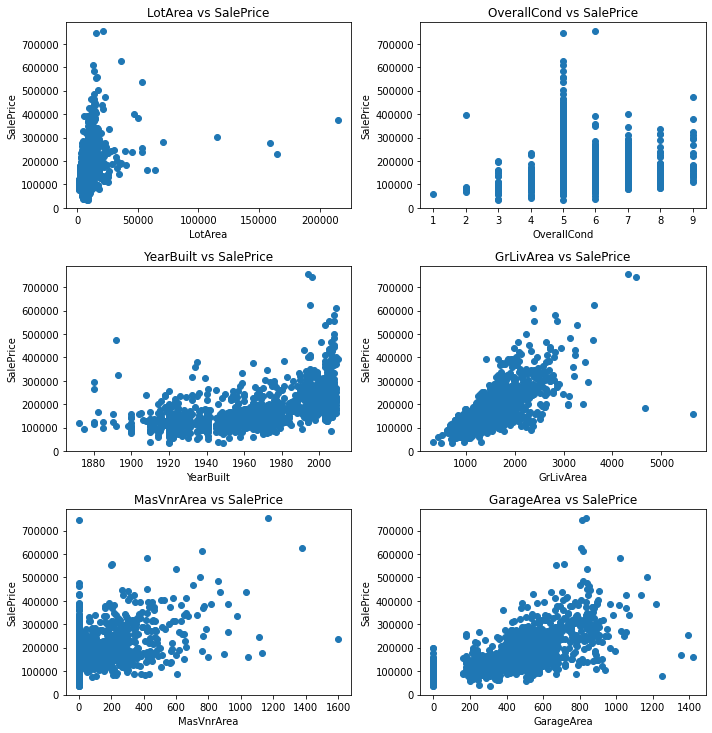

In [20]:
# some of the features like area,OverallCond , year etc might have direct relation on price. let's visualise.

def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(train_df[x], y_train)
    plt.title(x+' vs SalePrice')
    plt.ylabel('SalePrice')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('LotArea', 1)
scatter('OverallCond', 2)
scatter('YearBuilt', 3)
scatter('GrLivArea', 4)
scatter('MasVnrArea', 5)
scatter('GarageArea', 6)

plt.tight_layout()

Area doesn't seem to have much impact as year and GrLivArea have on target variable.  

In [21]:
from sklearn.preprocessing import LabelEncoder

col = ['MSZoning', 'Street', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',\
        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle',\
        'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',\
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',\
        'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',\
        'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
for i in range(len(col)):
    globals()['level_%s' % i] = LabelEncoder()
    train_df[col[i]] =  globals()['level_%s' % i].fit_transform(train_df[col[i]])
#train_df = pd.get_dummies(train_df, columns=col, drop_first=True) 

Due to increase in significant variables, not using one hot encoding/dummification.

In [22]:
train_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.00000,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.00000,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003,1,2,548,4,4,2,0,61,0,0,0,0,2,2008,8,4
2,20,3,80.00000,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.00000,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976,1,2,460,4,4,2,298,0,0,0,0,0,5,2007,8,4
3,60,3,68.00000,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.00000,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001,1,2,608,4,4,2,0,42,0,0,0,0,9,2008,8,4
4,70,3,60.00000,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.00000,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998,2,3,642,4,4,2,0,35,272,0,0,0,2,2006,8,0
5,60,3,84.00000,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.00000,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000,1,3,836,4,4,2,192,84,0,0,0,0,12,2008,8,4
6,50,3,85.00000,14115,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.00000,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,5,1,1993,2,2,480,4,4,2,40,30,0,320,0,0,10,2009,8,4
7,20,3,75.00000,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.00000,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,1,2004,1,2,636,4,4,2,255,57,0,0,0,0,8,2007,8,4
8,60,3,70.00000,10382,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.00000,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,4,1,1973,1,2,484,4,4,2,235,204,228,0,0,0,11,2009,8,4
9,50,4,51.00000,6120,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.00000,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,4,5,1931,2,2,468,1,4,2,90,0,205,0,0,0,4,2008,8,0


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df[train_df.columns] = scaler.fit_transform(train_df[train_df.columns])
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.23529,0.75000,0.15068,0.03342,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.20833,0.25000,0.28571,0.00000,0.71429,0.66667,0.50000,0.94928,0.88333,0.20000,0.14286,0.85714,0.86667,0.33333,0.12250,0.66667,1.00000,0.40000,0.50000,0.75000,0.75000,0.33333,0.12509,0.83333,0.00000,0.06421,0.14010,0.20000,0.00000,1.00000,1.00000,0.11978,0.41356,0.00000,0.25923,0.33333,0.00000,0.66667,0.50000,0.37500,0.33333,0.66667,0.50000,1.00000,0.00000,1.00000,0.16667,0.99652,0.33333,0.50000,0.38646,0.80000,0.80000,1.00000,0.00000,0.11152,0.00000,0.00000,0.00000,0.00000,0.09091,0.50000,1.00000,0.80000
2,0.00000,0.75000,0.20205,0.03880,1.00000,1.00000,1.00000,0.00000,0.50000,0.00000,1.00000,0.12500,0.28571,0.00000,0.28571,0.55556,0.87500,0.75362,0.43333,0.20000,0.14286,0.57143,0.53333,0.66667,0.00000,1.00000,1.00000,0.20000,0.50000,0.75000,0.25000,0.00000,0.17328,0.83333,0.00000,0.12158,0.20655,0.20000,0.00000,1.00000,1.00000,0.21294,0.00000,0.00000,0.17483,0.00000,0.50000,0.66667,0.00000,0.37500,0.33333,1.00000,0.33333,1.00000,0.33333,0.80000,0.16667,0.98308,0.33333,0.50000,0.32440,0.80000,0.80000,1.00000,0.34772,0.00000,0.00000,0.00000,0.00000,0.00000,0.36364,0.25000,1.00000,0.80000
3,0.23529,0.75000,0.16096,0.04651,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.20833,0.25000,0.28571,0.00000,0.71429,0.66667,0.50000,0.93478,0.86667,0.20000,0.14286,0.85714,0.86667,0.33333,0.10125,0.66667,1.00000,0.40000,0.50000,0.75000,0.50000,0.33333,0.08611,0.83333,0.00000,0.18579,0.15057,0.20000,0.00000,1.00000,1.00000,0.13447,0.41937,0.00000,0.27355,0.33333,0.00000,0.66667,0.50000,0.37500,0.33333,0.66667,0.33333,1.00000,0.33333,0.80000,0.16667,0.99552,0.33333,0.50000,0.42877,0.80000,0.80000,1.00000,0.00000,0.07678,0.00000,0.00000,0.00000,0.00000,0.72727,0.50000,1.00000,0.80000
4,0.29412,0.75000,0.13356,0.03856,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.25000,0.25000,0.28571,0.00000,0.71429,0.66667,0.50000,0.31159,0.33333,0.20000,0.14286,0.92857,1.00000,0.66667,0.00000,1.00000,1.00000,0.00000,0.75000,0.25000,0.75000,0.00000,0.03827,0.83333,0.00000,0.23116,0.12373,0.20000,0.50000,1.00000,1.00000,0.14387,0.36610,0.00000,0.26055,0.33333,0.00000,0.33333,0.00000,0.37500,0.33333,0.66667,0.41667,1.00000,0.33333,0.40000,0.83333,0.99403,0.66667,0.75000,0.45275,0.80000,0.80000,1.00000,0.00000,0.06399,0.49275,0.00000,0.00000,0.00000,0.09091,0.00000,1.00000,0.00000
5,0.23529,0.75000,0.21575,0.06058,1.00000,0.00000,1.00000,0.00000,0.50000,0.00000,0.62500,0.25000,0.28571,0.00000,0.71429,0.77778,0.50000,0.92754,0.83333,0.20000,0.14286,0.85714,0.86667,0.33333,0.21875,0.66667,1.00000,0.40000,0.50000,0.75000,0.00000,0.33333,0.11605,0.83333,0.00000,0.20976,0.18740,0.20000,0.00000,1.00000,1.00000,0.18609,0.50993,0.00000,0.35117,0.33333,0.00000,0.66667,0.50000,0.50000,0.33333,0.66667,0.58333,1.00000,0.33333,0.80000,0.16667,0.99502,0.33333,0.75000,0.58956,0.80000,0.80000,1.00000,0.22404,0.15356,0.00000,0.00000,0.00000,0.00000,1.00000,0.50000,1.00000,0.80000


# 4. Model Building

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

## using RFE to get best 30 features at first.

In [25]:
X_train = train_df
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [26]:
rfe.support_

array([ True, False,  True,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False])

In [27]:
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'ScreenPorch',
       'PoolArea'],
      dtype='object')

In [28]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,Condition2,OverallQual,OverallCond,YearBuilt,RoofMatl,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,PoolArea
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.23529,0.15068,0.03342,1.00000,0.00000,0.28571,0.66667,0.50000,0.94928,0.14286,0.33333,0.12250,0.66667,0.50000,0.06421,0.14010,0.11978,0.41356,0.25923,0.33333,0.37500,0.33333,0.66667,0.50000,1.00000,0.99652,0.50000,0.00000,0.00000,0.00000
2,0.00000,0.20205,0.03880,1.00000,0.00000,0.28571,0.55556,0.87500,0.75362,0.14286,0.66667,0.00000,1.00000,0.50000,0.12158,0.20655,0.21294,0.00000,0.17483,0.00000,0.37500,0.33333,1.00000,0.33333,1.00000,0.98308,0.50000,0.34772,0.00000,0.00000
3,0.23529,0.16096,0.04651,1.00000,0.00000,0.28571,0.66667,0.50000,0.93478,0.14286,0.33333,0.10125,0.66667,0.50000,0.18579,0.15057,0.13447,0.41937,0.27355,0.33333,0.37500,0.33333,0.66667,0.33333,1.00000,0.99552,0.50000,0.00000,0.00000,0.00000
4,0.29412,0.13356,0.03856,1.00000,0.00000,0.28571,0.66667,0.50000,0.31159,0.14286,0.66667,0.00000,1.00000,0.75000,0.23116,0.12373,0.14387,0.36610,0.26055,0.33333,0.37500,0.33333,0.66667,0.41667,1.00000,0.99403,0.75000,0.00000,0.00000,0.00000
5,0.23529,0.21575,0.06058,1.00000,0.00000,0.28571,0.77778,0.50000,0.92754,0.14286,0.33333,0.21875,0.66667,0.50000,0.20976,0.18740,0.18609,0.50993,0.35117,0.33333,0.50000,0.33333,0.66667,0.58333,1.00000,0.99502,0.75000,0.22404,0.00000,0.00000


we have around 75 features, RFE gave us best 30 top features. after that will go to stats model to indepth study.

### assumpotion for better model
### 1. P value should be <0.05
### 2. VIF must be lower than < 5
### 3. High R-squared and Adj. R-squared
### 4. Low Prob (F-statistic)
### 5. Residual analysis should satisfy

In [29]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [30]:
X = sm.add_constant(X_train_rfe) #
lm = sm.OLS(y_train, X).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     252.0
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:35:29   Log-Likelihood:                -17202.
No. Observations:                1460   AIC:                         3.447e+04
Df Residuals:                    1429   BIC:                         3.463e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9617.9587    1.9e+04      0.506   

In [31]:
checkVIF(X)

,Features,VIF
0,const,514.72000
19,GrLivArea,131.63000
18,2ndFlrSF,90.35000
17,1stFlrSF,73.36000
16,TotalBsmtSF,5.09000
24,TotRmsAbvGrd,4.92000
7,OverallQual,3.55000
27,GarageCars,2.98000
13,ExterQual,2.45000
9,YearBuilt,2.42000


From above it's clear 
1. the column that is not making much sense is GrLivArea as it's P vlaue is 0.460. this indicates this feature isn't contributing much to the output.
2. same column has got highest, so that indicates some other variable is already explain the prediction, what the GrLivArea is doing.
3. for the very first time Adjusted R-Square is 0.841, that mean we are able to expalin 84% of the variance from the data. this is reallty good.
4. Prob (F-statistic) is nealry 0, that mean we haven't got this module just by chance. it's indeed a trust worthy. 
Let's continue removing GrLivArea as it's really not giving any much info.

### Model 2

In [32]:
X = X.drop(["GrLivArea"], axis = 1)
lm = sm.OLS(y_train, X).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     260.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:35:30   Log-Likelihood:                -17202.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1430   BIC:                         3.462e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.055e+04    1.9e+04      0.556   

In [33]:
print(checkVIF(X))

        Features       VIF
0          const 512.47000
17      1stFlrSF   5.82000
16   TotalBsmtSF   5.08000
23  TotRmsAbvGrd   4.81000
18      2ndFlrSF   3.91000
7    OverallQual   3.55000
26    GarageCars   2.97000
13     ExterQual   2.45000
20  BedroomAbvGr   2.40000
9      YearBuilt   2.36000
15     BsmtUnfSF   2.26000
14      BsmtQual   2.18000
19  BsmtFullBath   1.96000
22   KitchenQual   1.95000
25   GarageYrBlt   1.79000
1     MSSubClass   1.64000
12    MasVnrArea   1.62000
2    LotFrontage   1.55000
21  KitchenAbvGr   1.55000
8    OverallCond   1.33000
3        LotArea   1.29000
11    MasVnrType   1.27000
27    WoodDeckSF   1.20000
24    Functional   1.17000
4         Street   1.10000
10      RoofMatl   1.09000
29      PoolArea   1.09000
28   ScreenPorch   1.07000
5      Utilities   1.02000
6     Condition2   1.02000


1. Always we should focus on P-value before the VIF. in PoolArea is having highest P-value, that mean keeping this variable isn't really helping the regression module. 
2. Even after removing a feature, our Adjusted R Square, Probabilistic F-score, AIC, and BIC are good.

In next we can remove PoolArea and check for module performance. 

## Model 3

In [34]:
X = X.drop(["PoolArea"], axis = 1)
lm = sm.OLS(y_train, X).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     269.9
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:35:31   Log-Likelihood:                -17203.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1431   BIC:                         3.462e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.139e+04    1.9e+04      0.601   

In [35]:
checkVIF(X)

,Features,VIF
0,const,511.86000
17,1stFlrSF,5.78000
16,TotalBsmtSF,5.06000
23,TotRmsAbvGrd,4.79000
18,2ndFlrSF,3.86000
7,OverallQual,3.55000
26,GarageCars,2.96000
13,ExterQual,2.45000
20,BedroomAbvGr,2.40000
9,YearBuilt,2.36000


1. In this case Utilities and TotalBsmtSF are equally not good for model. Since it's always better to remove only 1 feature at a time. will remove  Utilities and try. 
2. Even after removing a feature, our Adjusted R Square, Probabilistic F-score, AIC, and BIC are good.

In next we can remove Utilities and check for module performance. 

### Model 4

In [36]:
X = X.drop(["Utilities"], axis = 1)
lm = sm.OLS(y_train, X).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     279.3
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:35:32   Log-Likelihood:                -17204.
No. Observations:                1460   AIC:                         3.446e+04
Df Residuals:                    1432   BIC:                         3.461e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.142e+04    1.9e+04      0.602   

In [37]:
checkVIF(X)

,Features,VIF
0,const,511.86000
16,1stFlrSF,5.78000
15,TotalBsmtSF,5.05000
22,TotRmsAbvGrd,4.78000
17,2ndFlrSF,3.85000
6,OverallQual,3.55000
25,GarageCars,2.96000
12,ExterQual,2.44000
19,BedroomAbvGr,2.40000
8,YearBuilt,2.36000


1. All the P-values are in check and only TotalBsmtSF is having a high P-value along with VIF. will remove TotalBsmtSF and try in next module.
 Again. all the stats like Adjusted R Square, Probabilistic F-score, AIC, and BIC are in check.

## model 5

In [38]:
X = X.drop(["TotalBsmtSF"], axis = 1)
lm = sm.OLS(y_train, X).fit() 
print(lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     289.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:35:33   Log-Likelihood:                -17206.
No. Observations:                1460   AIC:                         3.447e+04
Df Residuals:                    1433   BIC:                         3.461e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.222e+04    1.9e+04      0.644   

In [39]:
checkVIF(X)

,Features,VIF
0,const,511.64000
21,TotRmsAbvGrd,4.72000
16,2ndFlrSF,3.85000
15,1stFlrSF,3.76000
6,OverallQual,3.53000
24,GarageCars,2.94000
12,ExterQual,2.44000
18,BedroomAbvGr,2.39000
8,YearBuilt,2.35000
13,BsmtQual,2.11000


### Cool! at model 5, we can see that all the feature P-values and VIF are within the accepted ranges.

# 5. Testing the performance on same data and Residual Analysis of Model

In [40]:
print(X.columns.values)
lm = sm.OLS(y_train,X).fit()
y_train_price = lm.predict(X)

['const' 'MSSubClass' 'LotFrontage' 'LotArea' 'Street' 'Condition2'
 'OverallQual' 'OverallCond' 'YearBuilt' 'RoofMatl' 'MasVnrType'
 'MasVnrArea' 'ExterQual' 'BsmtQual' 'BsmtUnfSF' '1stFlrSF' '2ndFlrSF'
 'BsmtFullBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'GarageYrBlt' 'GarageCars' 'WoodDeckSF' 'ScreenPorch']


In [41]:
y_train_price.head(2)

Id
1   225194.54007
2   183569.05399
dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Errors')

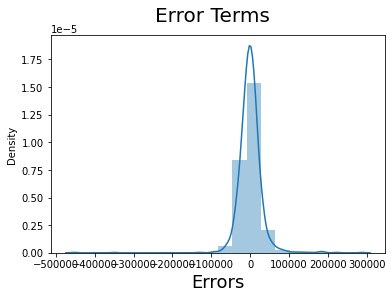

In [42]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error seems to follow normal distribution as expected for residual analysis. We are good with the model.

Text(0, 0.5, 'y_train_price')

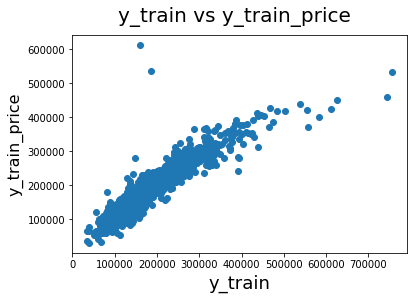

In [43]:
fig = plt.figure()
plt.scatter(y_train,y_train_price)
fig.suptitle('y_train vs y_train_price', fontsize=20)             
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_price', fontsize=16)   

# 6. Model performance on test data and submit for evaluation.

In [44]:
test_df.drop(['PoolQC', 'Alley', 'MiscFeature', 'MiscVal', 'Fence'], axis=1, inplace= True)
test_df.fillna({'FireplaceQu':'no', 'GarageType':'no', 'GarageFinish':'no', 'GarageQual':'no',\
                 'GarageCond':'no', 'MasVnrType':'None', \
                 'BsmtQual':'no', 'BsmtCond':'no', 'BsmtExposure':'no', \
                 'BsmtFinType1':'no', 'BsmtFinType2':'no'}, inplace=True)
test_df['LotFrontage'].fillna(int((test_df['LotFrontage'].mean())), inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)
test_df['GarageYrBlt'].fillna(0, inplace=True)
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].astype(int)
test_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,TA,CBlock,TA,TA,No,Rec,468.00000,LwQ,144.00000,270.00000,882.00000,GasA,TA,Y,SBrkr,896,0,0,896,0.00000,0.00000,1,0,2,1,TA,5,Typ,0,no,Attchd,1961,Unf,1.00000,730.00000,TA,TA,Y,140,0,0,0,120,0,6,2010,WD,Normal


In [45]:
for i in range(len(col)):
    test_df[col[i]] =  globals()['level_%s' % i].fit_transform(test_df[col[i]])
print(test_df.shape)

(1459, 74)


In [46]:
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])
test_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,0.00000,0.50000,0.20205,0.04825,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.50000,0.12500,0.28571,0.00000,0.28571,0.44444,0.62500,0.64493,0.18333,0.20000,0.00000,0.71429,0.80000,0.66667,0.00000,1.00000,1.00000,0.20000,0.75000,0.75000,0.75000,0.66667,0.08292,0.50000,0.09769,0.11558,0.14435,0.00000,1.00000,1.00000,0.75000,0.12896,0.00000,0.00000,0.10588,0.00000,0.00000,0.33333,0.00000,0.25000,0.33333,1.00000,0.25000,1.00000,0.00000,1.00000,0.16667,0.97562,0.66667,0.25000,0.51481,0.60000,0.80000,1.00000,0.16336,0.00000,0.00000,0.00000,0.25000,0.00000,0.45455,1.00000,1.00000,0.80000
1462,0.00000,0.75000,0.20548,0.06061,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.50000,0.25000,0.28571,0.00000,0.28571,0.55556,0.62500,0.62319,0.13333,0.60000,0.00000,0.78571,0.86667,0.33333,0.06750,1.00000,1.00000,0.20000,0.75000,0.75000,0.75000,0.00000,0.16354,0.83333,0.00000,0.17380,0.21751,0.00000,1.00000,1.00000,0.75000,0.22832,0.00000,0.00000,0.18745,0.00000,0.00000,0.33333,0.50000,0.37500,0.33333,0.66667,0.33333,1.00000,0.00000,1.00000,0.16667,0.97413,0.66667,0.25000,0.22003,0.60000,0.80000,1.00000,0.45858,0.06581,0.00000,0.00000,0.00000,0.00000,0.45455,1.00000,1.00000,0.80000


In [47]:
test_df = sm.add_constant(test_df)
test_df = test_df[X.columns]
test_df.head(2)

,const,MSSubClass,LotFrontage,LotArea,Street,Condition2,OverallQual,OverallCond,YearBuilt,RoofMatl,MasVnrType,MasVnrArea,ExterQual,BsmtQual,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,1.00000,0.00000,0.20205,0.04825,1.00000,0.28571,0.44444,0.62500,0.64493,0.00000,0.66667,0.00000,1.00000,0.75000,0.11558,0.12896,0.00000,0.00000,0.25000,0.33333,1.00000,0.25000,1.00000,0.97562,0.25000,0.16336,0.25000
1462,1.00000,0.00000,0.20548,0.06061,1.00000,0.28571,0.55556,0.62500,0.62319,0.00000,0.33333,0.06750,1.00000,0.75000,0.17380,0.22832,0.00000,0.00000,0.37500,0.33333,0.66667,0.33333,1.00000,0.97413,0.25000,0.45858,0.00000


In [48]:
test_df.columns

Index(['const', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Condition2',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')

In [49]:
pred_out = lm.predict(test_df)

In [50]:
pred_out.head(2)

Id
1461   112783.84773
1462   155662.67218
dtype: float64

In [51]:
sample['SalePrice'] = pred_out.values.astype(int)
sample.head(3)

,Id,SalePrice
0,1461,112783
1,1462,155662
2,1463,164736


In [52]:
sample.to_csv('submission.csv', index = False)

End of notebook. Happy Learning!  :D